In [7]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [3]:
#import the useful libraries.
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Machine Learning
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [10]:
#read the data set of "Titanic" in df
df = pd.read_csv("tested.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
# Display the number of rows and columns of the dataframe df
df.shape

(418, 12)

In [36]:
# Statistical information for the dataframe df
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [37]:
# print the information of non null count and data types of the columns of the dataframe df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [38]:
# Print the null values of the dataframe df
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [39]:
#Calculate the Null values percentage in dataframe df
df.isnull().sum()/len(df) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

### Drop the columns having null values more 40%

In [40]:
# drop the cabin column
df.drop(['Cabin'] , axis = 1 , inplace = True)

In [41]:
# chechk if the Cabin column is dropped
df.shape

(418, 11)

In [42]:
# list of columns in the dataframe df
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

### Handling Missing Values

In [43]:
#calculate the Age column for the data type integer. Age can vary from person to person so we cannot fill the null values.
df.Age.describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [44]:
#Check for null values in Age column
df.Age.isnull().sum()

86

In [45]:
# Print the mean of teh Age column
Age_mean = df.Age.mean()
Age_mean

30.272590361445783

In [46]:
# fill the null values in the Age column with the mean
df.Age  = df.Age.fillna(Age_mean)

In [47]:
# check for any null values after replacing the null values with mean values 
df.Age.isnull().sum()

0

In [48]:
#Check for null Values in Fare Column
df.Fare.isnull().sum()

1

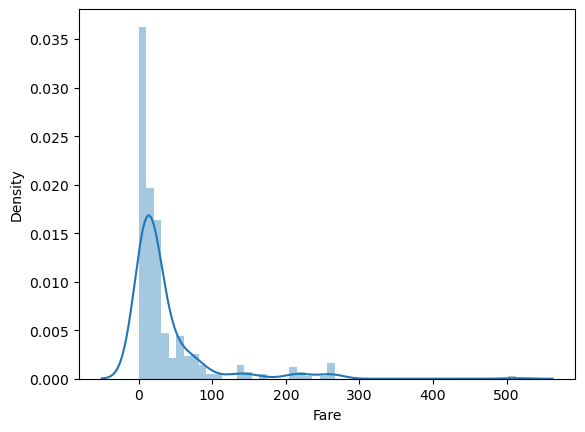

In [49]:
#plot distplot for Fare column from dataframe df
sns.distplot(df.Fare)
plt.show()

### Conclusion :- Here we can see that the fare column shows right skew hence we can fill it with the mean value

In [50]:
#find the mean of the Fare Column
df.Fare.mean()

35.627188489208635

In [51]:
# Fill the Fare column with the mean value
df.Fare = df.Fare.fillna("Mean")
df.Fare 

0       7.8292
1          7.0
2       9.6875
3       8.6625
4      12.2875
        ...   
413       8.05
414      108.9
415       7.25
416       8.05
417    22.3583
Name: Fare, Length: 418, dtype: object

In [52]:
# check for null values after replacing with mean values
df.Fare.isnull().sum()

0

### Handling the Outliers in the Dataframe


In [53]:
# list the numerical columns from the dataframe
num_cols = df.select_dtypes(include = ["number"]).columns.tolist()
num_cols

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch']

In [54]:
# list the Categorical columns from the dataframe
cat_cols = df.select_dtypes(include = ["object"]).columns.tolist()
cat_cols

['Name', 'Sex', 'Ticket', 'Fare', 'Embarked']

### Handling Outliers for numerical columns of the dataframe df

In [55]:
#list of numerical columns
num_cols

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch']

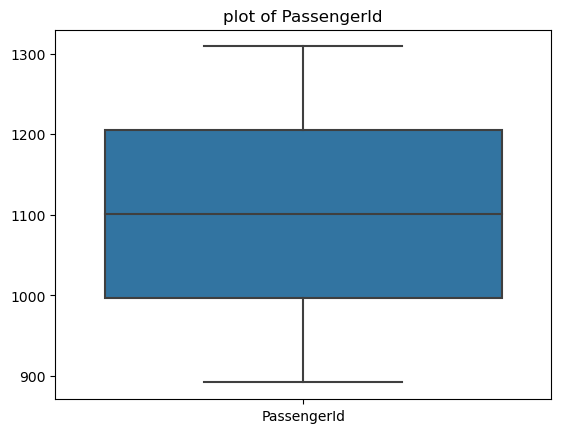

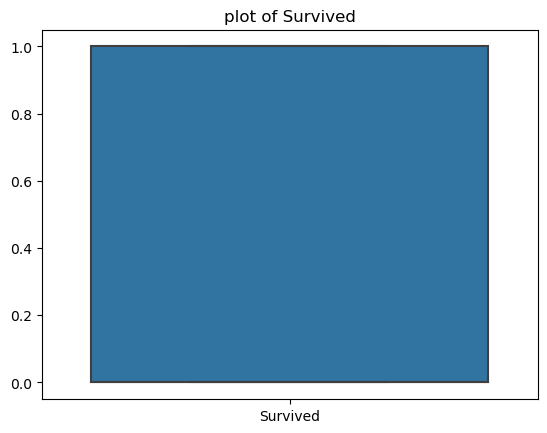

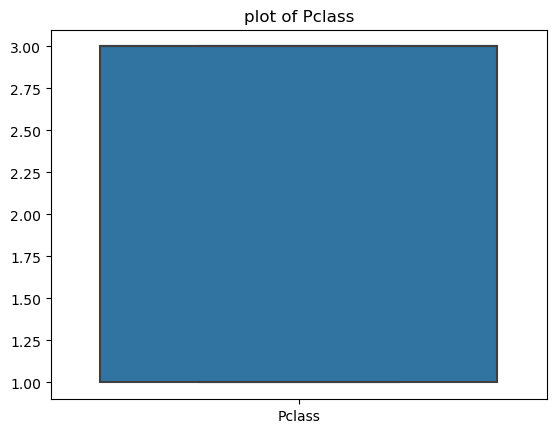

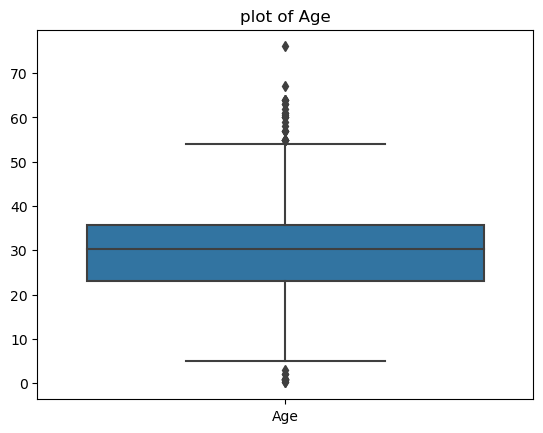

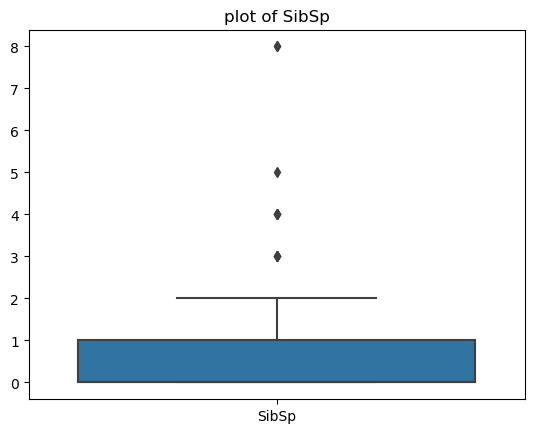

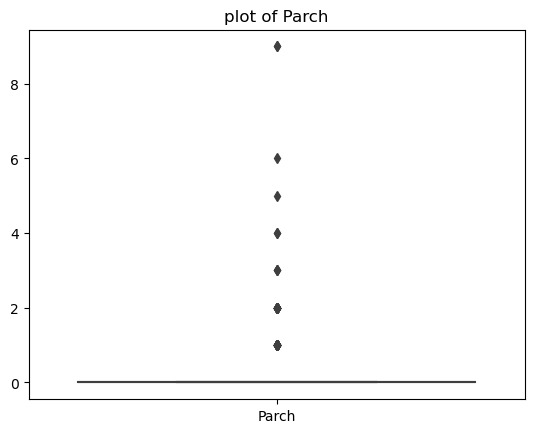

In [56]:
# plot the box plot for num_cols
for i in num_cols:
    sns.boxplot(df[[i]])
    plt.title("plot of " + i)
    plt.show()

In [57]:
# check for Outliers in SibSp column
df.SibSp.value_counts()

0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: SibSp, dtype: int64

##### Conclusion:- here the Outlier is 8

In [58]:
# check for outliers in Parch column
df.Parch.value_counts()

0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: Parch, dtype: int64

##### Conclusion:- here the Outlier is 9

### Check for data imbalance by analysing the survived column

In [59]:
# Display the Value_count of the Survived Variable
df.Survived.value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [60]:
# Value count for Survived column in percentage
df.Survived.value_counts(normalize=True)

0    0.636364
1    0.363636
Name: Survived, dtype: float64

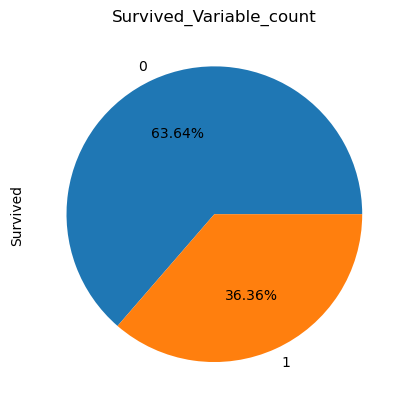

In [61]:
# Plot the pie chart of Target categories
target_counts = df.Survived.value_counts(normalize=True)
target_counts.plot.pie(autopct='%1.2f%%')
plt.title("Survived_Variable_count")
plt.show()

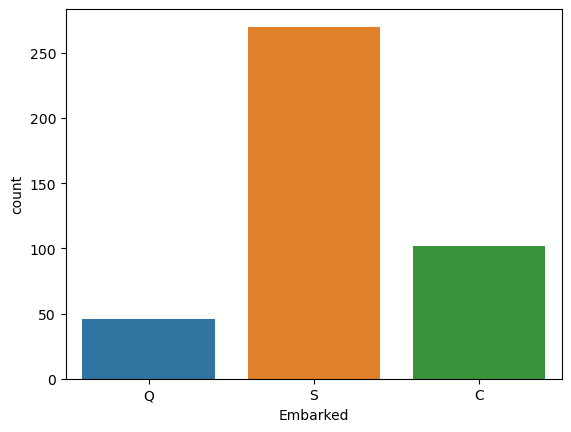

In [62]:
sns.countplot(x=df['Embarked'])
plt.title = ('Embarked')
plt.show()

### Bivariant Analysis for Categorical data in dataframe df

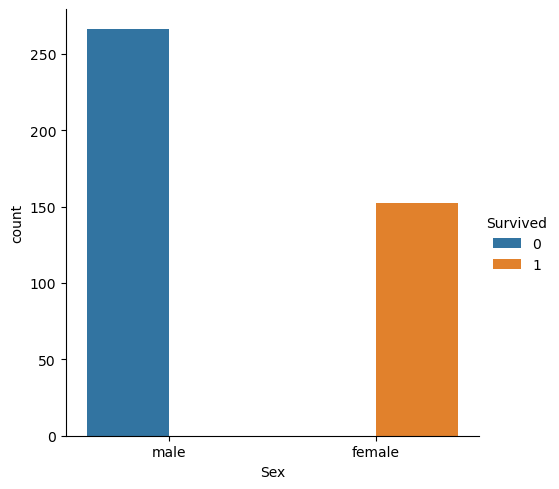

In [63]:
# Plot a catplot for Gener wise Survival
df.groupby(['Sex', 'Survived']) ['Survived'].count()
sns.catplot(x="Sex", hue="Survived", kind="count", data=df)
plt.show()

##### Observation :- we can conclude that 152 females have survived and 266 males have not survived

In [64]:
# groupby gender 
df.groupby(['Sex', 'Survived']) ['Survived'].count()

Sex     Survived
female  1           152
male    0           266
Name: Survived, dtype: int64

In [65]:
Survived = df[df["Survived"] == 1]
Survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,S
6,898,1,3,"Connolly, Miss. Kate",female,30.00000,0,0,330972,7.6292,Q
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.00000,0,0,2657,7.2292,C
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.00000,1,0,21228,82.2667,S
...,...,...,...,...,...,...,...,...,...,...,...
409,1301,1,3,"Peacock, Miss. Treasteall",female,3.00000,1,1,SOTON/O.Q. 3101315,13.775,S
410,1302,1,3,"Naughton, Miss. Hannah",female,30.27259,0,0,365237,7.75,Q
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.00000,1,0,19928,90.0,Q
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.00000,0,0,347086,7.775,S


### Creating buckets from age columns 

In [66]:
df["age_group"] = pd.cut(df.Age[:5],[0,20,40,60,80] , labels= ["<20" , "20-40" , "40-60" ,"60-80"])
df.age_group.value_counts(normalize = True)

20-40    0.6
40-60    0.2
60-80    0.2
<20      0.0
Name: age_group, dtype: float64

In [67]:
df.Age.head()

0    34.5
1    47.0
2    62.0
3    27.0
4    22.0
Name: Age, dtype: float64

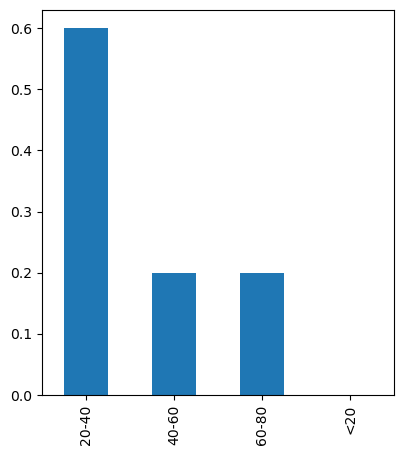

In [68]:
#plot the bar graph of Age column
plt.figure(figsize = [10,5])
plt.subplot(1,2,1)
df.age_group.value_counts(normalize = True).plot.bar()
plt.show()

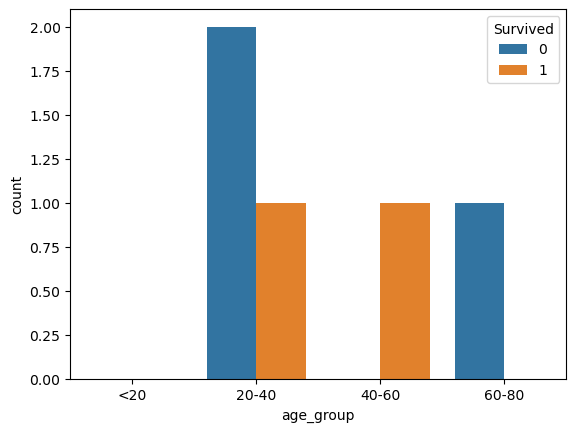

In [69]:
#plot countplot for age_group
sns.countplot(df , x = "age_group" , hue= "Survived")
plt.show()

In [71]:
# correlation chart for dataframe df
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch
PassengerId,1.000000,-0.023245,-0.026751,-0.030874,0.003818,0.043080
Survived,-0.023245,1.000000,-0.108615,-0.000011,0.099943,0.159120
Pclass,-0.026751,-0.108615,1.000000,-0.440782,0.001087,0.018721
Age,-0.030874,-0.000011,-0.440782,1.000000,-0.079535,-0.045073
SibSp,0.003818,0.099943,0.001087,-0.079535,1.000000,0.306895
Parch,0.043080,0.159120,0.018721,-0.045073,0.306895,1.000000


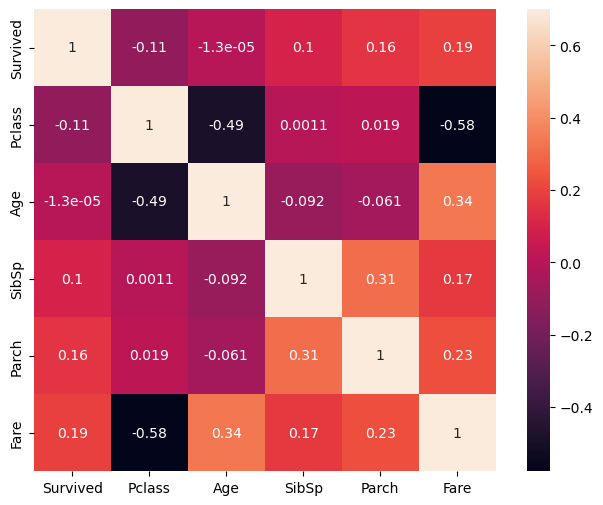

In [12]:
#plot a Heatmap for correlation matrix plot between the variables
df.drop(['PassengerId'] , axis = 1 , inplace = True)
corr = df.corr()
fig = plt.figure(figsize=(8,6))
sns.heatmap(corr, vmax = 0.7, square = True, annot = True)
plt.show()

#### Observations:-
- A correlation matrix plot uses colors to represent the correlation values. Usually, red means a strong positive correlation, blue means a strong negative correlation, and white means no correlation. The darker the color, the stronger the correlation. 
- The cell at the intersection of Survived and Fare has a red color and a value of 0.19. This means that there is a weak positive correlation between Survived and Fare, meaning that passengers who paid higher fares had a slightly higher chance of survival.
- The cell at the intersection of Age and Survived has a red colour and a value of -1.3e-05. This means that there is almost no correlation between Age and Survived, meaning that the age of the passengers did not affect their survival outcome. 
- The cell at the intersection of Pclass and Fare has a black color and a value of -0.58. This means that there is a negative correlation between Pclass and Fare, meaning that passengers who belonged to lower classes paid lower fares.
- The cell at the intersection of Age and Fare has a orange color and a value of 0.34. This means that there is a positive correlation between age and Fare  

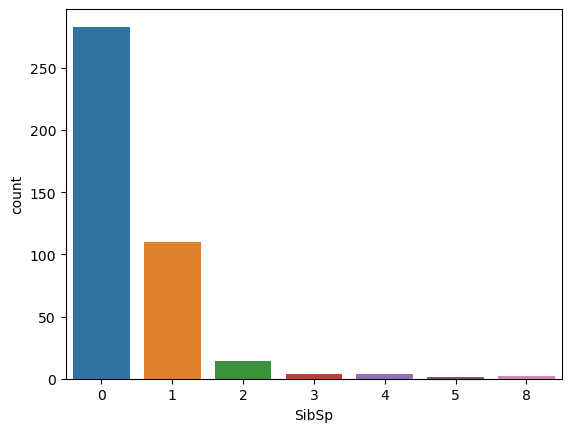

In [73]:
# plot Countplot for SibSp Column
sns.countplot(x='SibSp', data = df)
plt.Title = ("SibSp")
plt.show()

In [74]:
# Print the Not null and Data types information of the dataframe df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Survived     418 non-null    int64   
 2   Pclass       418 non-null    int64   
 3   Name         418 non-null    object  
 4   Sex          418 non-null    object  
 5   Age          418 non-null    float64 
 6   SibSp        418 non-null    int64   
 7   Parch        418 non-null    int64   
 8   Ticket       418 non-null    object  
 9   Fare         418 non-null    object  
 10  Embarked     418 non-null    object  
 11  age_group    5 non-null      category
dtypes: category(1), float64(1), int64(5), object(5)
memory usage: 36.7+ KB


#### Convert categorical data into numerical
##### Step 1 to preparing data for Linear Regression
- We will convert Sex column where female=1 and male=0.

In [75]:
df['Sex'].replace(['female','male'], [0,1], inplace=True)

In [76]:
# Display the first 5 rows of the dataframe
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_group
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,Q,20-40
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0,S,40-60
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,Q,60-80
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,S,20-40
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,S,20-40


In [77]:
# Replace the initials from the Embarked column by 0, 1,2 
df['Embarked'].replace(['S','C', 'Q'], [0, 1, 2], inplace=True)

In [78]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_group
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,2,20-40
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0,0,40-60
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,2,60-80
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,0,20-40
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,0,20-40


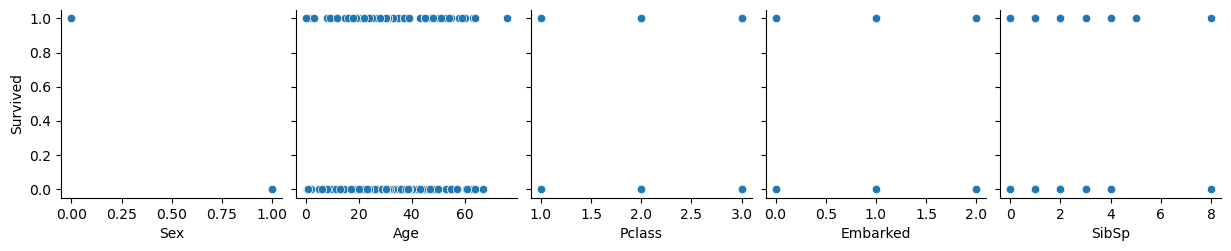

In [79]:
# visualise the data with scatter plot
sns.pairplot(data=df,
            x_vars=['Sex', 'Age', 'Pclass', 'Embarked', 'SibSp'],
            y_vars='Survived')
plt.show()

## Steps for Linear Regression:
- Create X(predictive variable) and y
- Create train and test sets (70-30, 80-20)
- Train model on the training set (i.e. learn the coefficient)
- Evaluate the model (Training set, test set)

In [80]:
# Create X and y
X = df[['Sex', 'Pclass', 'Embarked', 'SibSp']].values
y = df[['Survived']].values

In [81]:
# create train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

### Logistic Regression

In [82]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
test_score = round(logreg.score(X_test, y_test) * 100, 2)
test_score

100.0

### Decision Tree Classifier

In [84]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
decision_tree_score = round(decision_tree.score(X_train, y_train) * 100, 2)
decision_tree_score

100.0